# Notebook 3: Looking Around the Solar Neighborhood

We are going to use our calculations for the scale length to look at where our solar system would be located in h329 and look around that section of radius!

This is a good test to see what the galaxy behaves like in relation to where we would theoretically be located if we were the same scale lengths away from the center of h329 as we are to the center of the Milky Way.

## Setup of Everything that needs to run

In [1]:
import astropy

import matplotlib.pyplot as plt
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

% matplotlib inline

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/astro/store/gradscratch/tmp/sanchenn/h329gsonly_4096/h329.cosmo50PLK.3072gst5HbwK1BH.004096_gsonly'
h329, h329_h, h329_h1 = sim_setup(path_to_h329) 

## sim_setup is my code created to do the pynbody.load, physical_units(), sim.halos(), and make face-on for me 
## h329 is galaxy, h329_h is entire halo object, and h329_h1 is main halo
    ## We mainly use h329 or h329_h1

loading sim
making faceon


In [4]:
## Profiles Set up

## Gas particles profile:
h329_p_g = pynbody.analysis.profile.Profile(h329_h1.g, vmin =.01)
# Star particles profile:
h329_p_s = pynbody.analysis.profile.Profile(h329_h1.s, vmin =.01)

## Comparison of virial radius to max radius of the simulation
h329_Rvir = pynbody.analysis.halo.virial_radius(h329_h1) 
h329_Rmax = h329_h1.g['r'].max() ##This is R_MAX

print(h329_Rmax, h329_Rvir)

241.5968246100956 156.66934749611534


In [5]:
## Setting up disk filter (done in Notebook 2)
radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)

## Filtered disk of h329
h329_s_disk = h329.s[f_disk]

In [6]:
## Setting up vertical profiles

h329_p_s_vert = profile.VerticalProfile(h329_h1.s, '3 kpc', '5 kpc', '5 kpc')

## Now setting up vertical profiles using filters on galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01)

## Sun's Locatino Based on Scale Length 

Reminder from Notebook 2: 

r_0 for h329 is 3.28

r_0 for MW is 3.5

In [7]:
## Sun's scale length distance in MW

h329_r0 = 3.25 ## all of these in kpc
MW_r0 = 3.5
MW_sun_d = 8

##How many scale lengths away sun is in MW
MW_sun_scale_d = MW_sun_d / MW_r0
MW_sun_scale_d

2.2857142857142856

In [8]:
## Sun's scale length distance in h329

h329_sun_d = MW_sun_scale_d * h329_r0 
h329_sun_d ## distance in kpc sun is from the center of h329 usinf the MW scale length

7.428571428571428

In h329 the distance to the sun would be about 7.5 kpc! We can then do +/- 1 kpc for looking around the solar neighborhood and creating profiles below:

## New vertical profile: from 6.5 - 8.5 kpc

In [10]:
## Defining our radial range and height
inner_rad = '6.5 kpc'
outer_rad = '8.5 kpc'
vertical_h = '2 kpc'

h329_p_s_vert_sliced_new = profile.VerticalProfile(h329_s_disk, inner_rad, outer_rad, vertical_h)

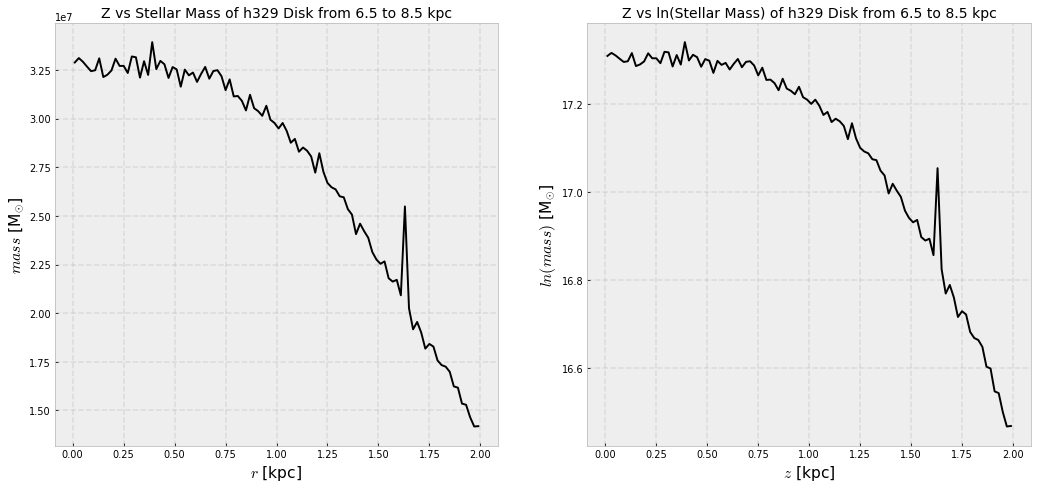

In [16]:
## Graphing around the solar neighborhood and looking at the z versus stellar mass

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_vert_sliced_new['rbins'].in_units('kpc'), h329_p_s_vert_sliced_new['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Z vs Stellar Mass of h329 Disk from 6.5 to 8.5 kpc')

axs[1].plot(h329_p_s_vert_sliced_new['rbins'].in_units('kpc'), np.log(h329_p_s_vert_sliced_new['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$z$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Z vs ln(Stellar Mass) of h329 Disk from 6.5 to 8.5 kpc');

These Gaussian versus parabola does not look as well defined as in the previous notebook so we may not have as good of a scale height fit!

### Fitting z v mass (from radial range of 6.5 to 8.5) to sech^2 function!

The sech^2 in our last notebook got us the closest to a good scale height for h329, so I will mainly focus on fitting to the sech^2 function.

In [17]:
## Defining sech^2 again. Same as last notebook! my_z is the z axis array and my_amp is the additive constant

def sech2(my_z, my_z0, my_amp):
    y = ((np.cosh(my_z*my_z0))**(-2))*my_amp
    return y

In [18]:
## Our new arrays from above graph for doing fitting!

z_from_new = h329_p_s_vert_sliced_new['rbins'].in_units('kpc')
m_from_new = h329_p_s_vert_sliced_new['mass'].in_units('Msol')

In [19]:
## fitpars_sech2 is the fit for the z0 value and additive constant value
fitpars_sech2, error_sech2 = curve_fit(sech2, z_from_new, m_from_new)

print(fitpars_sech2)

[ -4.47685257e-01   3.43509281e+07]


In [20]:
## Our z_0 value based off the sech^2 fit
my_z0_sech2 = -1/(fitpars_sech2[0])
my_z0_sech2

2.2337121556773107

This z_0 value is very large compared to our other ones in the previous notebook! And it is not very close to our textbook value for the Milky Way.

### Fitting z v mass (from 7 to 9) graph to quadratic

Since the sech^2 didn't work well let's try parabolic anyway.

In [21]:
## my_z is z-axis, my_p2 is term in front of z^2 in polynomial, and my_const is the additive constant

def quad_cen(my_z, my_p2, my_const):
    y = (my_p2 *(my_z**2)) + my_const
    return y

In [22]:
## Fit values from quadratic function

fitpars_quad, error_quad = curve_fit(quad_cen, z_from_new, np.log(m_from_new))

print(fitpars_quad)

[ -0.20076119  17.36511449]


In [23]:
## Our z_0 value based off the quadratic fit (centered on z=0)
my_z0_quad = np.sqrt(-1/fitpars_quad[0])
my_z0_quad

2.2318249195492403

This still is very different from our previous scale height values from Notebook 2, and is not much different from the value estimate dfrom teh sech^2 fit. This value compared to our textbook value of the MW still is not super similar.

## Graph of Both Fits on Vertical Profile (from 6.5 to 8.5 kpc)

We can graph the fits on the original data but it won't look super accurate.

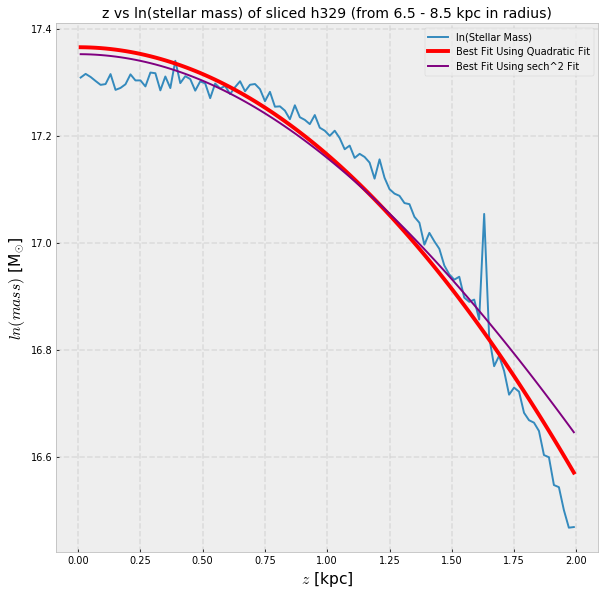

In [24]:
## Adding our fits to the original graph
fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_vert_sliced_new['rbins'].in_units('kpc'), np.log(h329_p_s_vert_sliced_new['mass'].in_units('Msol')), label='ln(Stellar Mass)')
plt.plot(h329_p_s_vert_sliced_new['rbins'].in_units('kpc'), quad_cen(z_from_new, *fitpars_quad), linewidth = 4, color = 'r', label = 'Best Fit Using Quadratic Fit')
plt.plot(h329_p_s_vert_sliced_new['rbins'].in_units('kpc'), np.log(sech2(z_from_new, *fitpars_sech2)), color = 'purple', label = 'Best Fit Using sech^2 Fit')

plt.xlabel('$z$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('z vs ln(stellar mass) of sliced h329 (from 6.5 - 8.5 kpc in radius)')
plt.legend()

I increased the linewidth of the red fit line above to see it better against the purple but both the quadratic and sech^2 fit basically trace eachother with some slight variation (they don't perfectly trace eachother). Compared to our other fits (when we were doing 5-20 radial kpc) the fits here are not very accurate in terms of how well they trace the real data (in blue above). 

# Velocity Dispersion

From https://pynbody.github.io/pynbody/_modules/pynbody/analysis/profile.html

Let's look at the velocity dispersion as well around the solar neighborhood so we can see a comparison!

In [25]:
h329_p_s_new = pynbody.analysis.profile.Profile(h329_s_disk)

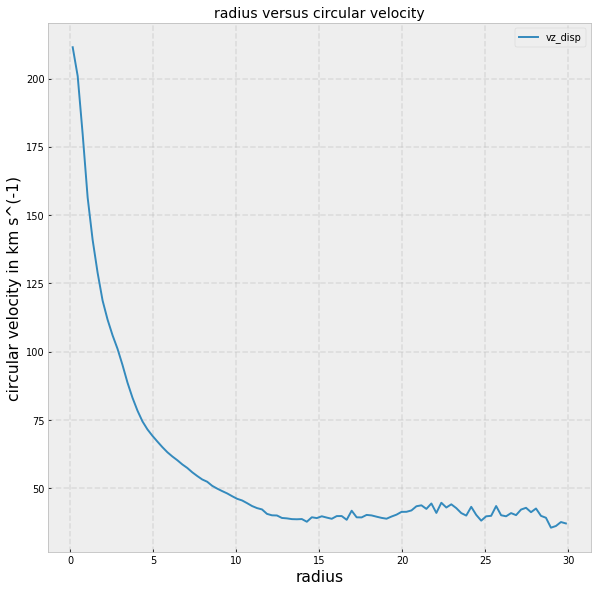

In [26]:
fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_new['rbins'].in_units('kpc'), h329_p_s_new['vz_disp'].in_units('km s**-1'), label='vz_disp')

plt.xlabel('radius', fontsize=16)
plt.ylabel('circular velocity in km s^(-1)', fontsize=16)
plt.title('radius versus circular velocity')
plt.legend()

# Filter around Sun Location in h329

Let's filter around the sun's location and see if it fixed any of the alignment problems we had with the galaxy not being parallel to the normal plane.

In [27]:
## Filter parameters

r_1 = 6.5
r_2 = 8.5

h_1 = 2
cen = (0,0,0)

In [28]:
## Filter out around the solar neighborhood

filt_solar_neighbor = pynbody.filt.SolarNeighborhood(r_1, r_2, h_1, cen)

In [29]:
## Using filters to pick out the section of the galaxy

h329_s_solar_neighbor = h329.s[filt_solar_neighbor]

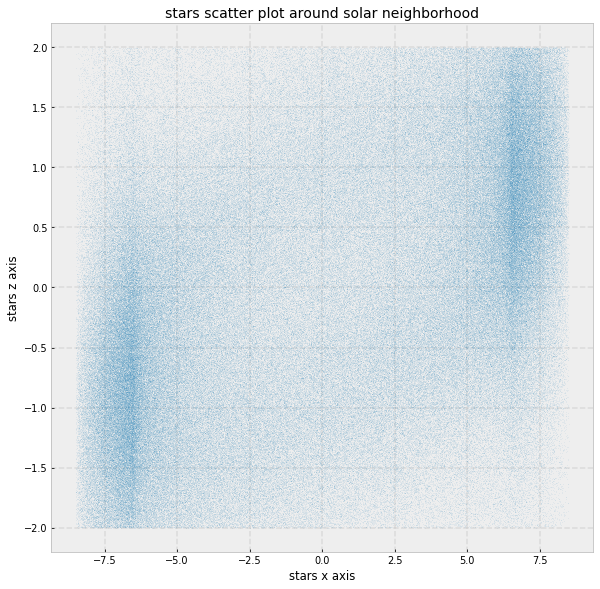

In [30]:
fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(np.array(h329_s_solar_neighbor['x']), np.array(h329_s_solar_neighbor['z']), '.', markersize=0.05)

plt.xlabel('stars x axis')
plt.ylabel('stars z axis')
plt.title('stars scatter plot around solar neighborhood')

As we can see the distribution of the star particles are not perfectly distributed along the z=0 line still!

## Side-on picture after filtering around the solar neighborhood

I am making a new filter below (a disk filter) that cuts out all the way up to the upper limit of our solar neighborhood (so 0 to 8.5 kpc)

In [32]:
## New filter
filt_disk = pynbody.filt.Disc(r_2, h_1, cen)

In [33]:
## disk of h329 stars up to the solar neighborhood upper limit (8.5)
h329_s_disk_upto_sol = h329.s[filt_disk]

In [34]:
pynbody.analysis.angmom.sideon(h329_s_disk_upto_sol)

/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/sph/__init__.py:581: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros((ny, nx), dtype=np.float32)
/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/plot/stars.py:66: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)
/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/plot/stars.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  brightest_mag.append(ordered[-len(ordered) / 5000])


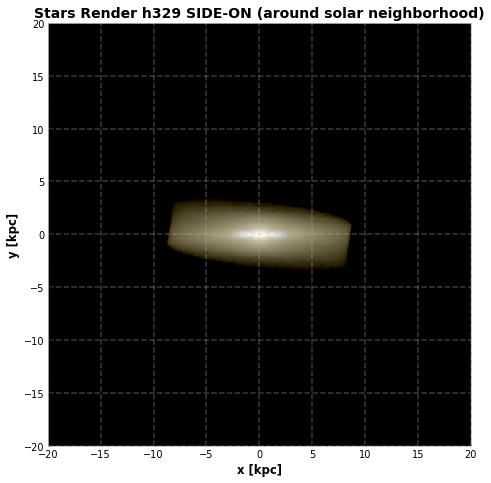

In [35]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk_upto_sol, width = '40 kpc', dynamic_range=5)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON (around solar neighborhood)', fontweight='bold');

# End

As we can see the alignment on the plane is not fixed and is an important thing to keep in mind as we continue on with any analyses of the h329 galaxy!